# ***Computational Statistics Mini-Project***

------------------------------------------------------------

Name: Shashank Bhosagi

Roll No. : CS2202

S.Y.Btech Division-B




-----------------------------

### ***DATASET***

Dataset was downloaded for UCI Machine Learning Repository 

Link to Dataset : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

There are two datasets on this website RED wine and WHITE wine but in this project we will use White wine

Problem Statement: Predict the quality of White-Wine using a classification method called ***Logistic Regression***

--------------------------------------------

### **1. Uploading the DataSet in Colab**

In [ ]:
from google.colab import files

uploaded = files.upload()

-----------------------------------------------------------

### *2. Load the file in a dataframe using Pandas*

In [ ]:
import pandas as pd

wine = pd.read_csv("/content/winequality-white.csv")

-----------------------------------------------------------------------------------------------------------------------------------------------

### **3. Describing the Data**

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Our data has 12 columns. And all columns seems to be in numeric form so its good for us.

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality (score between 0 and 10)

Where 12th Data **'quality'** is ***output variable***

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


All the values are in float or int so its great for us and no type conversions required.
No. of rows = 4898
Hence shape of the data is  **4838x12**

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


-------------------------------------------------------------------------------------------------------------------

###**4. Let's check for missing data if any** 

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Zeros indicate that there is no null values in our Data-set!!

### **5. Converting the "quality" column from scores b/w 1-10 to 0's and 1's**

As the objective is to predict wine as good or bad we need to convert in result column  1 or 0

Where,

1 indicates good quality

0 indicates bad quality

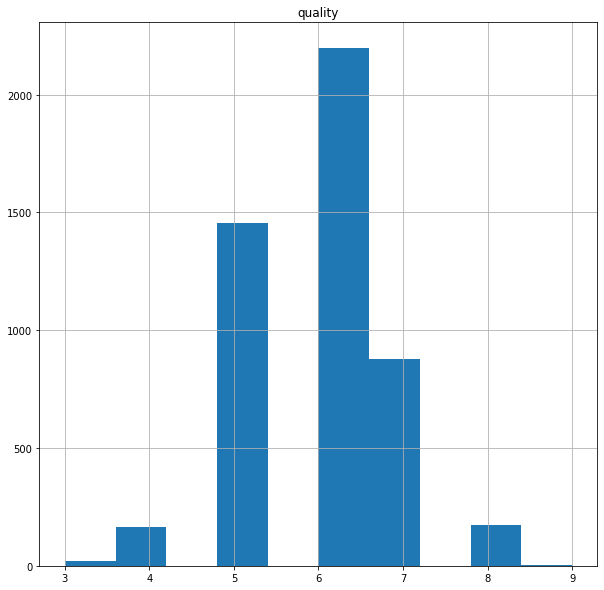

In [ ]:
import matplotlib.pyplot as plt
wine.hist(column = 'quality', figsize=(10,10))

plt.show()

From this histogram we can take the mid-point approx at 6.5
so we will set condition as 

if 3 to 6.5 (3 is lowest point) = 0

if 6.5 or greater = 1

In [ ]:
bins = (1, 6.5, 9)
classes = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = classes)

Let's check if the 'quality' column changed or not :)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,bad


It changed to the labels 'bad' or 'good' but we wanted 0 or 1 so here we can use LabelEncoder which is present in Skit-learn.preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
wine['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

Now we have converted the 'quality' column in a 0 or 1 format 

### **6. Preparing the data for classification**

Now we will split the dataset into training data and testing data with 70% data as training and remaining as testing.

In [ ]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(wine,test_size=0.30,random_state=565,stratify=wine['quality'])# stratify the outcome

train_X=train[train.columns[:11]]
test_X=test[test.columns[:11]]
train_Y=train['quality']
test_Y=test['quality']

### **7. Normalization of data using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
m = LogisticRegression()
m.fit(train_X,train_Y)
p = m.predict(test_X)

In [ ]:
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))

The accuracy Score is:
 0.8074829931972789


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Classification Report:")
print(classification_report(test_Y,p ))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1152
           1       0.61      0.30      0.40       318

    accuracy                           0.81      1470
   macro avg       0.72      0.62      0.64      1470
weighted avg       0.78      0.81      0.78      1470



In [ ]:
from sklearn.metrics import roc_auc_score,confusion_matrix
roc_auc_score(test_Y,p)

0.6233294025157232

In [ ]:
conf = confusion_matrix(test_Y,p)
conf

array([[1092,   60],
       [ 223,   95]])

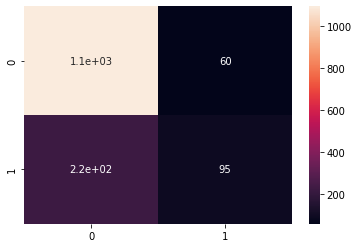

In [ ]:
import seaborn as sns
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)